# CSCI-UA 0473 - Introduction to Machine Learning
## Thursday, January 25, 2018

## Logistic Regression 

### Key Points
SETUP: We have a set of data points $\{(x_{1}, y_{1}), (x_{2}, y_{2}), ... , (x_{n}, y_{n})\}$, where $x_{i} \in R^{d}$ are the feature vectors and $y_{i} \in \{0, 1\}$ are the class labels.

MODEL: $p_{+} = p(y = 1|x) = \frac{1}{1 + e^{-w.x + b}}$, where $w, b \in R^{d}$

DISTANCE FUNCTION: -$(y * log(p_{+}) + (1 - y) * log(1 - p_{+}))$

LEARNING RULE: $w \leftarrow w - \eta * (\hat{y} - y) * x$

In [166]:
%matplotlib notebook
%matplotlib inline

import numpy
import matplotlib.pyplot as plot

import matplotlib
matplotlib.rc('text', usetex=True)

In [167]:
numpy.random.seed(1234)

## 1. Data Preparation

In [168]:
from sklearn.datasets import make_blobs

In [169]:
# Sample dataset preparation

n_dim = 2
x_train, y_train = make_blobs(n_samples=100, n_features=n_dim, centers=[[1,1],[-1,-1]], shuffle=True)
x_test, y_test = make_blobs(n_samples=100, n_features=n_dim, centers=[[1,1],[-1,-1]], shuffle=True)

## 2. Model Definition

In [170]:
'''
Sigmoid function.

INPUT: A scalar/vector
OUTPUT: A value between (0, 1) for each input component
'''

def sigmoid(a):
    return 1. / (1. + numpy.exp(-a))

In [171]:
'''
Definition of the logistic regression model.

INPUT: Feature vector (x) and weight vector (w)
OUTPUT: The probability of each data point belonging to the positive class.
'''

def logreg(x, w, pre=False):
    x = x.reshape([1, -1]) if len(x.shape) < 2 else x
    
    y = numpy.sum(x * w[None,:-1], axis=1) + w[-1]
    if pre:
        return y    
    return sigmoid(y)

In [172]:
'''
Distance function of the logistic regression model (popularly called likelihood). 

INPUT: True labels (y), feature vector (x) and weight vector (w)
OUTPUT: Log of the likelihood for the given 'w'
'''

def logreg_dist(y, x, w, avg=False):
    y_ = logreg(x, w)
    
    d = -(y * numpy.log(y_) + (1. - y) * numpy.log(1-y_))
    
    if not avg:
        return d
    return numpy.mean(d)

In [173]:
'''
Learning rule for the logistic regression model.

INPUT: True labels (y), feature vector (x) and weight vector (w)
OUTPUT: The direction of update for the weight vector
'''

def logreg_rule(y, x, w):
    y_ = logreg(x, w)
    dw = numpy.zeros(w.shape)
    dw[:-1] = numpy.mean((y_ - y)[:, None] * x, axis=0)
    dw[-1] = numpy.mean(y_ - y)
    return dw

## 3. Learning Process

In [174]:
# Initializing the weight vector randomly
w0 = numpy.random.randn(n_dim+1); w0[-1] = 0.
w = numpy.copy(w0)

n_iter = 1000
eta = .1   # Learning rate
old_cost = numpy.Inf

for ni in range(n_iter):
    pred_y = logreg(x_train, w)
    
    w -= eta * logreg_rule(y_train, x_train, w)    # Updating the weight vector
    
    cost = logreg_dist(y_train, x_train, w, avg=True)
    
    if numpy.mod(ni, 50) == 0:
        print('Logistic regression cost {:.4f} after iteration {}'.format(cost, ni))
    if cost < 1e-16 or cost / old_cost >= 1.:
        print('Converged')
        break
    old_cost = cost

Logistic regression cost 1.7992 after iteration 0
Logistic regression cost 0.2140 after iteration 50
Logistic regression cost 0.1548 after iteration 100
Logistic regression cost 0.1329 after iteration 150
Logistic regression cost 0.1210 after iteration 200
Logistic regression cost 0.1133 after iteration 250
Logistic regression cost 0.1078 after iteration 300
Logistic regression cost 0.1038 after iteration 350
Logistic regression cost 0.1007 after iteration 400
Logistic regression cost 0.0982 after iteration 450
Logistic regression cost 0.0962 after iteration 500
Logistic regression cost 0.0945 after iteration 550
Logistic regression cost 0.0931 after iteration 600
Logistic regression cost 0.0918 after iteration 650
Logistic regression cost 0.0908 after iteration 700
Logistic regression cost 0.0899 after iteration 750
Logistic regression cost 0.0891 after iteration 800
Logistic regression cost 0.0884 after iteration 850
Logistic regression cost 0.0877 after iteration 900
Logistic regres

In [175]:
print('Initial: {:.3f} x_1 + {:.3f} x_2 + {:.3f} = 0'.format(*list(w0)))
print('Final: {:.3f} x_1 + {:.3f} x_2 + {:.3f} = 0'.format(*list(w)))

Initial: 0.901 x_1 + 0.753 x_2 + 0.000 = 0
Final: -3.417 x_1 + -1.738 x_2 + 0.358 = 0


## 4. Visualize Final Model

In [176]:
# visualize data 
def vis_data(x, y = None, c='r', open_figure=False):
    if open_figure:
        plot.figure()
    if y is None: 
        y = [None] * len(x)
    for x_, y_ in zip(x, y):
        if y_ is None:
            plot.plot(x_[0], x_[1], 'o', markerfacecolor='none', markeredgecolor=c)
        else:
            plot.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')
    plot.grid('on')

In [177]:
def vis_hyperplane(w, typ='k--'):

    lim0 = plot.gca().get_xlim()
    lim1 = plot.gca().get_ylim()
    m0, m1 = lim0[0], lim0[1]

    intercept0 = -(w[0] * m0 + w[-1])/w[1]
    intercept1 = -(w[0] * m1 + w[-1])/w[1]
    
    plt1, = plot.plot([m0, m1], [intercept0, intercept1], typ)

    plot.gca().set_xlim(lim0)
    plot.gca().set_ylim(lim1)
    
    
    return plt1

In [178]:
def vis_decision_boundary_contour(w, typ='k--'):
    
    lim0 = plot.gca().get_xlim()
    lim1 = plot.gca().get_ylim()
    
    x_ = numpy.linspace(lim0[0], lim0[1], 100)
    y_ = numpy.linspace(lim1[0], lim1[1], 100)
    xx, yy = numpy.meshgrid(x_, y_)
    
    x_tra_ = numpy.concatenate([xx.ravel()[:,None], yy.ravel()[:,None]], axis=1)
    
    pred = logreg(x_tra_, w)
    plt1 = plot.contourf(xx, yy, pred.reshape(xx.shape), cmap=plot.cm.coolwarm, alpha=0.4)
    
    plot.colorbar(plt1)
    
    plot.gca().set_xlim(lim0)
    plot.gca().set_ylim(lim1)
    
    
    return plt1

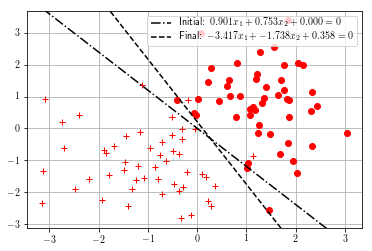

In [179]:
plot.figure()

vis_data(x_train, y_train, c='r')

plt0 = vis_hyperplane(w0, 'k-.')
plt1 = vis_hyperplane(w, 'k--')
plot.legend([plt0, plt1], [
        'Initial: ${:.3f} x_1 + {:.3f} x_2 + {:.3f} = 0$'.format(*list(w0)),
        'Final: ${:.3f} x_1 + {:.3f} x_2 + {:.3f} = 0$'.format(*list(w))],
           loc='best')

#plot.show()

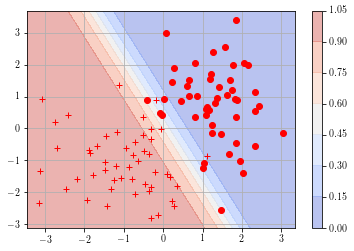

In [180]:
vis_data(x_train, y_train, c= 'r', open_figure=True)
vis_decision_boundary_contour(w)

## 5. Testing

No handles with labels found to put in legend.


Text(0.5,1,'Decision boundary on test data')

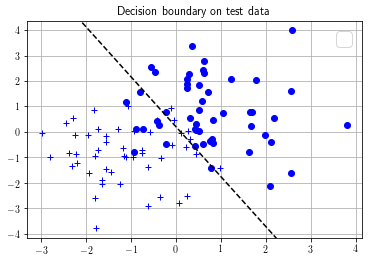

In [181]:
# Decision boundary on test data

plot.figure()

vis_data(x_test, y_test, 'b')

plt1 = vis_hyperplane(w, 'k--')

plot.legend([plt0, plt1], [
        'Initial: {:.3f} x_1 + {:.3f} x_2 + {:.3f} = 0'.format(*list(w0)),
        'Final: {:.3f} x_1 + {:.3f} x_2 + {:.3f} = 0'.format(*list(w))],
           loc='upper right')

plot.legend(fontsize = 20, loc = 'best')
plot.title('Decision boundary on test data')
#plot.show()

In [182]:
train_error = numpy.sum(numpy.abs(numpy.round(logreg(x_train, w)) - y_train)) / numpy.float(len(y_train))
test_error = numpy.sum(numpy.abs(numpy.round(logreg(x_test, w)) - y_test)) / numpy.float(len(y_test))

print('Training error rate {}, Test error rate {}'.format(train_error, test_error))

Training error rate 0.03, Test error rate 0.14


## 6. HOMEWORK - Use scikit-learn to replicate the above operations

In [183]:
# Use this cell to import required packages of sklearn

from sklearn.linear_model import LogisticRegression

In [184]:
# STEP 1: Create a Logistic Regression class instance

# some other models that can be considered, discussion of these are below
# model = LogisticRegression(C=4, fit_intercept=True, max_iter=1000, random_state=1234, tol=1e-16)
# model = LogisticRegression(C=5, fit_intercept=True, max_iter=1000, random_state=1234, tol=1e-16)
# model = LogisticRegression(C=10, fit_intercept=True, max_iter=1000, random_state=1234, tol=1e-16)

model = LogisticRegression(C=1, fit_intercept=True, max_iter=1000, random_state=1234, tol=1e-16)

In [185]:
# STEP 2: Fit the logistic regression model to the training data

model.fit(X=x_train, y=y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1234, solver='liblinear', tol=1e-16,
          verbose=0, warm_start=False)

In [186]:
# STEP 3: Obtain the coefficients of the learned model (read the documentation to find out how)
# Uncomment and complete the following

sk_w = numpy.append(model.coef_[0], model.intercept_)

In [187]:
# STEP 4: Compare the feature coefficients obtained by sklearn and the custom module we have

# Note: Print the equations of the model learned by both implementations and comment about what you observe.
# Uncomment and complete the following

print('Custom : {:.3f} x_1 + {:.3f} x_2 + {:.3f} = 0'.format(*list(w)))
print('Sklearn: {:.3f} x_1 + {:.3f} x_2 + {:.3f} = 0'.format(*list(sk_w)))

# we obtain near identical training and testing error rates (training: 0.03 (scikit) - 0.03 (custom model),
# testing: 0.15 (scikit) - 0.14 (custom model)) for the scikit and custom models if we use identical
# hyperparameters for each model, it could be that the scikit model found a different constant multiple
# of the custom model however I believe that in this case that there are many decision boundaries with
# similar training/testing errors and the scikit model found one of these rather than what the custom
# model found
#
# print('{:.3f}'.format(w[0]/w[1]))
# print('{:.3f}'.format(sk_w[0]/sk_w[1]))
# if we uncomment the lines below we can see that the angle of the decision boundary of the scikit model
# and the custom model are very close to each other
#
# if we vary the hyperparameters of the scikit models, such as removing the tolerance term and increasing/
# decreasing the number of maximum iterations we do not observe significant changes in the scikit model
# the biggest difference occurs when we change the regularization strength of the scikit model, as we 
# increase the regularization strength from 1 to 5 gives us equivalent errors to the custom model
# and greatly similar coefficients to the custom model while regularization strength of 10 gives us 
# equivalent errors but different coefficients, this is also further evidence that there are more than
# one decision boundaries with similar training/testing errors, regularization strength of 4 gives us
# the closest match to the custom model with again same error rates, note: these other models are commented
# as above, for the assignment submission I have chosen to use regularization strength of 1

Custom : -3.417 x_1 + -1.738 x_2 + 0.358 = 0
Sklearn: -2.462 x_1 + -1.309 x_2 + 0.236 = 0


In [188]:
# STEP 5: Predict the class of test data points. Print the TRAINING and TEST accuracy.
# Uncomment and complete the following

train_error = 1 - model.score(X=x_train, y=y_train)
test_error = 1 - model.score(X=x_test, y=y_test)

print('Training error rate {:.2f}, Test error rate {:.2f}'.format(train_error, test_error))

Training error rate 0.03, Test error rate 0.15
